# Pokemon Image Classification

Victor Hugo Oyervides Covarrubias - A01382836

Cesar Buenfil

Lourdes Navarrete

In [57]:
import time
import numpy as np
import cupy as cp
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnn_utils_gpu import *
import time

In [2]:
#ENABLE CUDA
ENABLE_CUDA = True

Matplot and numpy configuration

In [3]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

Load the dataset data

In [4]:
#Set the dataset PATH
DATASET_PATH = "pikachu_charmander.hdf5"
train_img, train_labels, test_img, test_labels, dev_img, dev_labels, classes = load_data(DATASET_PATH)

Dataset example

y = 0. It's a Charman picture.


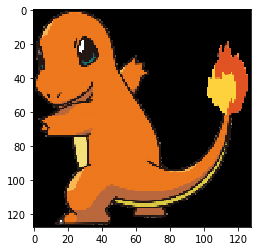

In [5]:
index = 5
plt.imshow(train_img[index])
print ("y = " + str(train_labels[0,index]) + ". It's a " + classes[train_labels[0,index]].decode("utf-8") +  " picture.")

Dataset information

In [85]:
#convert to cupy
if ENABLE_CUDA:
    train_img = cp.array(train_img)
    train_labels = cp.array(train_labels)
    test_img = cp.array(test_img)
    test_labels = cp.array(test_labels)
    dev_img = cp.array(dev_img)
    dev_labels = cp.array(dev_labels)

In [7]:
# Reshape the training and test examples 
train_img_flatten = train_img.reshape(train_img.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_img_flatten = test_img.reshape(test_img.shape[0], -1).T
dev_img_flatten = dev_img.reshape(dev_img.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_img  = train_img_flatten/255.
test_img = test_img_flatten/255.
dev_img = dev_img_flatten/255.

print ("train_img's shape: " + str(train_img.shape))
print ("test_img's shape: " + str(test_img.shape))
print ("dev_img's shape: " + str(dev_img.shape))


train_img's shape: (49152, 472)
test_img's shape: (49152, 58)
dev_img's shape: (49152, 62)


# L-Layer Neural Network


Layer dims declaration

In [8]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    array_param = []
    np.random.seed(1)
    costs = []  # keep track of cost
    # Parameters initialization. (≈ 1 line of code)
    ### START CODE HERE ###
    parameters = initialize_parameters_deep(layers_dims)
    ### END CODE HERE ###
    s = time.time()
    # Loop (gradient descent)
    for i in range(0, num_iterations):
        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        ### START CODE HERE ### (≈ 1 line of code)
        AL, caches = L_model_forward(X, parameters)
        ### END CODE HERE ###
        
        # Compute cost.
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(AL, Y)
        ### END CODE HERE ###
    
        # Backward propagation.
        ### START CODE HERE ### (≈ 1 line of code)
        grads = L_model_backward(AL, Y, caches)
        ### END CODE HERE ###

        # Update parameters.
        ### START CODE HERE ### (≈ 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###
        if ENABLE_CUDA:
            del AL
            del caches
            del grads
        # Calculate accuracy
        train_accuracy = accuracy(train_img, train_labels, parameters)
        dev_accuracy = accuracy(dev_img, dev_labels, parameters)
        array_param.append({
            "parameters" : parameters,
            "train_accuracy" : train_accuracy,
            "dev_accuracy" : dev_accuracy
        })
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            e = time.time()
            print ("Cost after iteration %i: %f" %(i, cost))
            print ("Train Accuracy: %f, Dev Accuracy: %f" %(train_accuracy, dev_accuracy))
            print ("Time: " + str(e - s))
            s = time.time()
        if print_cost and i % 100 == 0:
            costs.append(cost)
        
        if ENABLE_CUDA:
            cp._default_memory_pool.free_all_blocks()    

            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return array_param

In [9]:
def graph_accuracy(parameters):
    train_accuracy = []
    dev_accuracy = []

    for param in parameters:
        train_accuracy.append(param["train_accuracy"])
        dev_accuracy.append(param["dev_accuracy"])

    plt.plot(np.squeeze(train_accuracy))
    plt.plot(np.squeeze(dev_accuracy))
    plt.ylabel('Accuracy')
    plt.xlabel('iterations (per tens)')
    plt.title("Train vs Dev accuracy")
    plt.show()

In [10]:
def pick_best_model(parameters):
    best_model = parameters[0]
    for param in parameters:
        if best_model["dev_accuracy"] < param["dev_accuracy"]:
            best_model = param
    return best_model

# FIRST MODEL (ORIGINAL 4 LAYER NEURAL NETWORK, ORIGINAL LEARNING RATE)

In [11]:
layers_dims = [49152, 20, 7, 5, 1] #  4-layer model

Cost after iteration 0: 0.765286
Train Accuracy: 0.497881, Dev Accuracy: 0.516129
Time: 1.0362656116485596
Cost after iteration 100: 0.649168
Train Accuracy: 0.516949, Dev Accuracy: 0.500000
Time: 15.378826141357422
Cost after iteration 200: 0.533386
Train Accuracy: 0.845339, Dev Accuracy: 0.887097
Time: 16.01024317741394
Cost after iteration 300: 0.691647
Train Accuracy: 0.500000, Dev Accuracy: 0.500000
Time: 15.422883987426758
Cost after iteration 400: 0.604381
Train Accuracy: 0.586864, Dev Accuracy: 0.612903
Time: 15.668655633926392
Cost after iteration 500: 0.602068
Train Accuracy: 0.675847, Dev Accuracy: 0.677419
Time: 15.660110712051392
Cost after iteration 600: 0.443642
Train Accuracy: 0.752119, Dev Accuracy: 0.741935
Time: 15.750868320465088
Cost after iteration 700: 0.449235
Train Accuracy: 0.775424, Dev Accuracy: 0.774194
Time: 16.026341438293457
Cost after iteration 800: 0.391510
Train Accuracy: 0.830508, Dev Accuracy: 0.806452
Time: 15.794351577758789
Cost after iteration 9

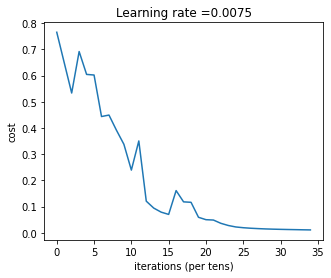

In [12]:
parameters = L_layer_model(train_img, train_labels, layers_dims, num_iterations = 3500, print_cost = True)

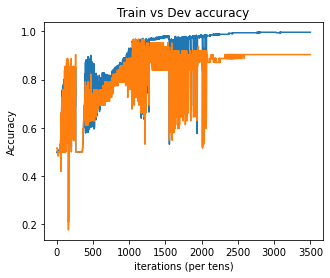

In [13]:
graph_accuracy(parameters)

In [14]:
best_parameters_first_model = pick_best_model(parameters)

In [58]:
pred_train_first = accuracy(train_img, train_labels, best_parameters_first_model["parameters"])

In [59]:
pred_dev_first = accuracy(dev_img, dev_labels, best_parameters_first_model["parameters"])

In [60]:
pred_test_first = accuracy(test_img, test_labels, best_parameters_first_model["parameters"])

# SECOND MODEL (ORIGINAL 4 LAYER NEURAL NETWORK, LOWER LEARNING RATE)


Cost after iteration 0: 0.765286
Train Accuracy: 0.502119, Dev Accuracy: 0.500000
Time: 0.1726381778717041
Cost after iteration 100: 0.665997
Train Accuracy: 0.597458, Dev Accuracy: 0.532258
Time: 15.90721583366394
Cost after iteration 200: 0.627028
Train Accuracy: 0.758475, Dev Accuracy: 0.790323
Time: 15.495498180389404
Cost after iteration 300: 0.660278
Train Accuracy: 0.599576, Dev Accuracy: 0.612903
Time: 15.86119794845581
Cost after iteration 400: 0.486419
Train Accuracy: 0.783898, Dev Accuracy: 0.870968
Time: 17.236385107040405
Cost after iteration 500: 0.349808
Train Accuracy: 0.911017, Dev Accuracy: 0.854839
Time: 15.630377054214478
Cost after iteration 600: 0.417967
Train Accuracy: 0.900424, Dev Accuracy: 0.887097
Time: 15.723758935928345
Cost after iteration 700: 0.240182
Train Accuracy: 0.925847, Dev Accuracy: 0.919355
Time: 15.256514549255371
Cost after iteration 800: 0.241745
Train Accuracy: 0.894068, Dev Accuracy: 0.870968
Time: 16.043291330337524
Cost after iteration 90

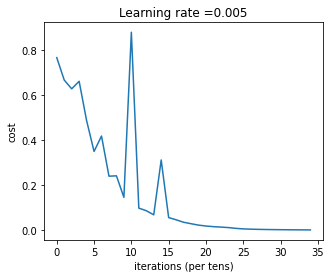

In [22]:
parameters = L_layer_model(train_img, train_labels, layers_dims, learning_rate = 0.0050 ,num_iterations = 3500, print_cost = True)

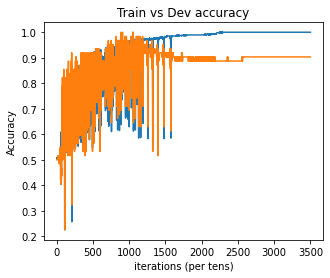

In [23]:
graph_accuracy(parameters)

In [24]:
best_parameters_second_model = pick_best_model(parameters)

In [61]:
pred_train_second = accuracy(train_img, train_labels, best_parameters_second_model["parameters"])

In [62]:
pred_dev_second = accuracy(dev_img, dev_labels, best_parameters_second_model["parameters"])

In [63]:
pred_test_second = accuracy(test_img, test_labels, best_parameters_second_model["parameters"])

# THIRD MODEL (ORIGINAL 4 LAYER NEURAL NETWORK, HIGHER LEARNING RATE)


Cost after iteration 0: 0.765286
Train Accuracy: 0.500000, Dev Accuracy: 0.500000
Time: 0.13464093208312988
Cost after iteration 100: 0.693079
Train Accuracy: 0.502119, Dev Accuracy: 0.500000
Time: 13.896494626998901
Cost after iteration 200: 0.692949
Train Accuracy: 0.502119, Dev Accuracy: 0.500000
Time: 14.538008213043213
Cost after iteration 300: 0.691534
Train Accuracy: 0.512712, Dev Accuracy: 0.548387
Time: 14.74535346031189
Cost after iteration 400: 0.685918
Train Accuracy: 0.567797, Dev Accuracy: 0.629032
Time: 14.689051628112793
Cost after iteration 500: 0.692564
Train Accuracy: 0.502119, Dev Accuracy: 0.500000
Time: 14.574712038040161
Cost after iteration 600: 0.690797
Train Accuracy: 0.508475, Dev Accuracy: 0.516129
Time: 14.802353620529175
Cost after iteration 700: 0.601570
Train Accuracy: 0.752119, Dev Accuracy: 0.838710
Time: 15.002130508422852
Cost after iteration 800: 0.652692
Train Accuracy: 0.756356, Dev Accuracy: 0.677419
Time: 15.32601523399353
Cost after iteration 9

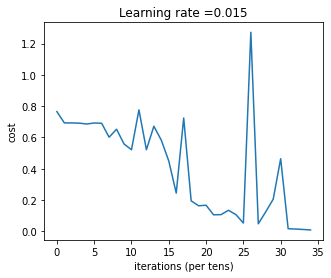

In [28]:
parameters = L_layer_model(train_img, train_labels, layers_dims, learning_rate = 0.015 ,num_iterations = 3500, print_cost = True)

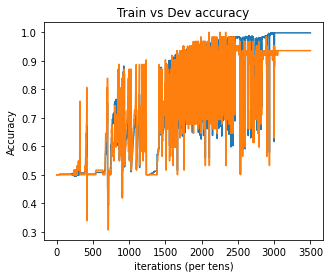

In [29]:
graph_accuracy(parameters)

In [30]:
best_parameters_third_model = pick_best_model(parameters)

In [64]:
pred_train_third = accuracy(train_img, train_labels, best_parameters_third_model["parameters"])

In [65]:
pred_dev_third = accuracy(dev_img, dev_labels, best_parameters_third_model["parameters"])

In [86]:
pred_test_third = accuracy(test_img, test_labels, best_parameters_third_model["parameters"])

## Model comparation


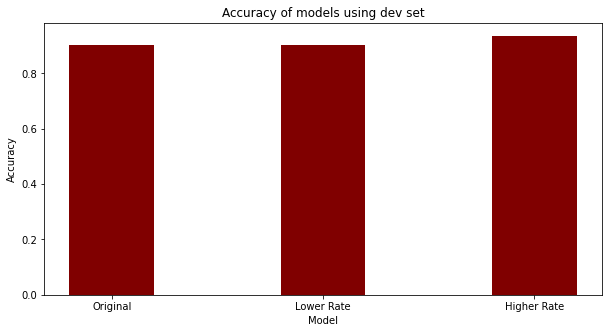

[array(0.90322581), array(0.90322581), array(0.93548387)]


In [71]:

datasets_plot = ['Original', 'Lower Rate', 'Higher Rate']
accuracy_plot = [pred_dev_first, pred_dev_second, pred_dev_third]
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(datasets_plot, accuracy_plot, color ='maroon',  
        width = 0.4) 
  
plt.xlabel("Model") 
plt.ylabel("Accuracy") 
plt.title("Accuracy of models using dev set") 
plt.show() 

print(accuracy_plot)

# FOURTH MODEL (6 LAYER NETWORK)

Cost after iteration 0: 0.693043
Train Accuracy: 0.500000, Dev Accuracy: 0.500000
Time: 0.1853945255279541
Cost after iteration 100: 0.607189
Train Accuracy: 0.790254, Dev Accuracy: 0.693548
Time: 16.301514625549316
Cost after iteration 200: 0.639391
Train Accuracy: 0.641949, Dev Accuracy: 0.596774
Time: 17.354056358337402
Cost after iteration 300: 0.488605
Train Accuracy: 0.593220, Dev Accuracy: 0.612903
Time: 17.334200859069824
Cost after iteration 400: 0.620024
Train Accuracy: 0.644068, Dev Accuracy: 0.612903
Time: 16.594749212265015
Cost after iteration 500: 0.378001
Train Accuracy: 0.826271, Dev Accuracy: 0.774194
Time: 16.72907328605652
Cost after iteration 600: 0.443598
Train Accuracy: 0.938559, Dev Accuracy: 0.887097
Time: 15.65000295639038
Cost after iteration 700: 0.355023
Train Accuracy: 0.872881, Dev Accuracy: 0.806452
Time: 15.405884742736816
Cost after iteration 800: 0.273200
Train Accuracy: 0.930085, Dev Accuracy: 0.838710
Time: 16.519144296646118
Cost after iteration 90

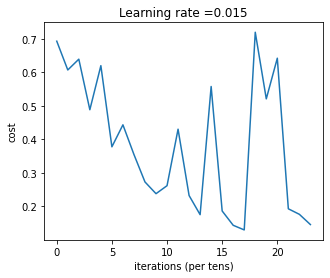

In [69]:
layers_dims = [49152, 20, 15, 10, 7, 5, 1] #  4-layer model
parameters = L_layer_model(train_img, train_labels, layers_dims, learning_rate = 0.015 ,num_iterations = 3500, print_cost = True)

In [72]:
best_parameters_fourth_model = pick_best_model(parameters)

In [73]:
pred_train_fourth = accuracy(train_img, train_labels, best_parameters_fourth_model["parameters"])

In [74]:
pred_dev_fourth = accuracy(dev_img, dev_labels, best_parameters_fourth_model["parameters"])

In [75]:
pred_test_fourth = accuracy(test_img, test_labels, best_parameters_fourth_model["parameters"])

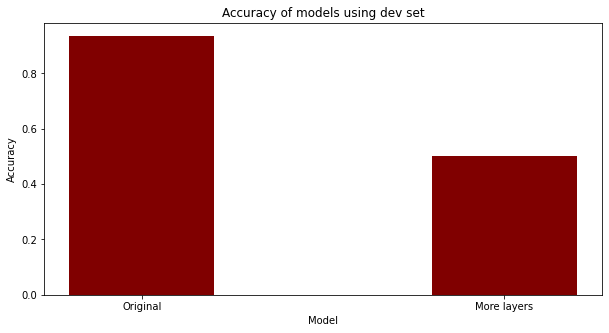

[array(0.93548387), array(0.5)]


In [76]:
datasets_plot = ['Original', 'More layers']
accuracy_plot = [pred_dev_third, pred_dev_fourth]
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(datasets_plot, accuracy_plot, color ='maroon',  
        width = 0.4) 
  
plt.xlabel("Model") 
plt.ylabel("Accuracy") 
plt.title("Accuracy of models using dev set") 
plt.show() 

print(accuracy_plot)

In [77]:
accuracy(test_img, test_labels, best_parameters_third_model["parameters"])

array(0.96551724)

In [89]:
accuracy(dev_img, dev_labels, best_parameters_third_model["parameters"])

array(0.93548387)

In [90]:
accuracy(train_img, train_labels, best_parameters_third_model["parameters"])

array(0.99788136)

In [88]:
if ENABLE_CUDA:
    test_img = cp.asnumpy(test_img)
    test_labels = cp.asnumpy(test_labels)
    pred_test_third = cp.asnumpy(pred_test_third)
    
print_mislabeled_images(classes, test_img, test_labels, pred_test_third)